# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [2]:
f = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f))
df = pd.read_csv(f)
df.head()

Path of read in data: ./data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

Numbers of remain columns: 65
0    202500.0
1    270000.0
2     67500.0
3    135000.0
4    121500.0
5     99000.0
6    171000.0
7    360000.0
8    112500.0
9    135000.0
Name: AMT_INCOME_TOTAL, dtype: float64


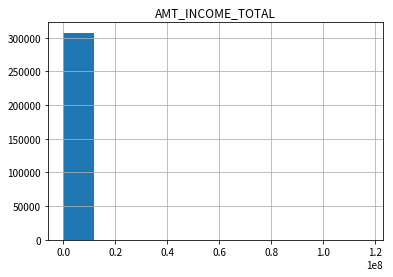

0     406597.5
1    1293502.5
2     135000.0
3     312682.5
4     513000.0
5     490495.5
6    1560726.0
7    1530000.0
8    1019610.0
9     405000.0
Name: AMT_CREDIT, dtype: float64


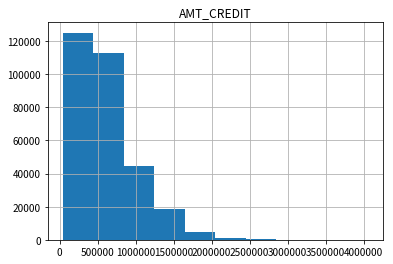

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
5    27517.5
6    41301.0
7    42075.0
8    33826.5
9    20250.0
Name: AMT_ANNUITY, dtype: float64


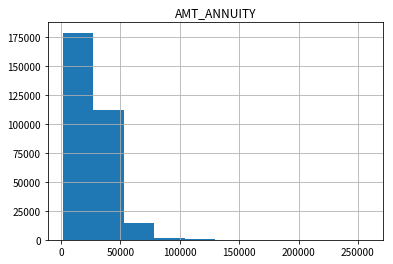

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
5     454500.0
6    1395000.0
7    1530000.0
8     913500.0
9     405000.0
Name: AMT_GOODS_PRICE, dtype: float64


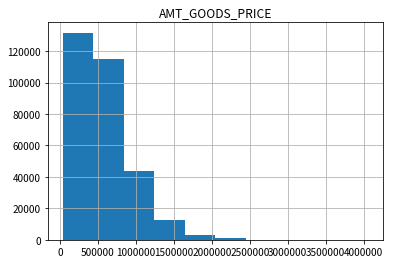

0    0.018801
1    0.003541
2    0.010032
3    0.008019
4    0.028663
5    0.035792
6    0.035792
7    0.003122
8    0.018634
9    0.019689
Name: REGION_POPULATION_RELATIVE, dtype: float64


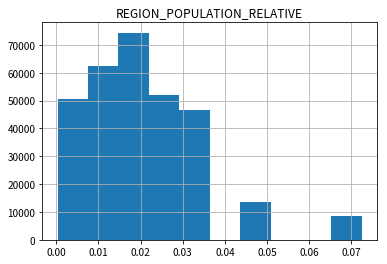

0    -3648.0
1    -1186.0
2    -4260.0
3    -9833.0
4    -4311.0
5    -4970.0
6    -1213.0
7    -4597.0
8    -7427.0
9   -14437.0
Name: DAYS_REGISTRATION, dtype: float64


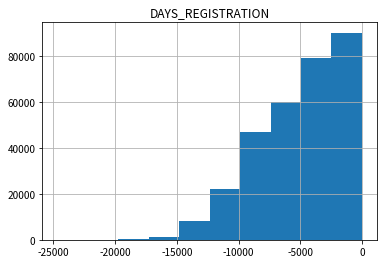

0     NaN
1     NaN
2    26.0
3     NaN
4     NaN
5     NaN
6    17.0
7     8.0
8     NaN
9     NaN
Name: OWN_CAR_AGE, dtype: float64


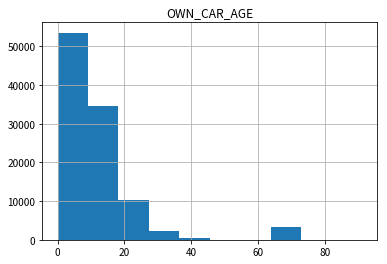

0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
5    2.0
6    3.0
7    2.0
8    2.0
9    1.0
Name: CNT_FAM_MEMBERS, dtype: float64


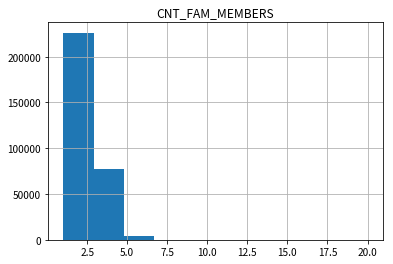

0    0.083037
1    0.311267
2         NaN
3         NaN
4         NaN
5         NaN
6    0.774761
7         NaN
8    0.587334
9         NaN
Name: EXT_SOURCE_1, dtype: float64


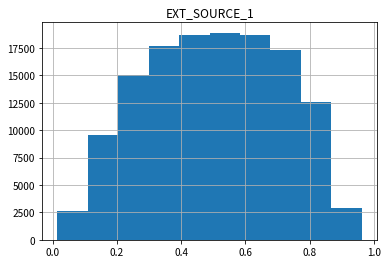

0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
5    0.354225
6    0.724000
7    0.714279
8    0.205747
9    0.746644
Name: EXT_SOURCE_2, dtype: float64


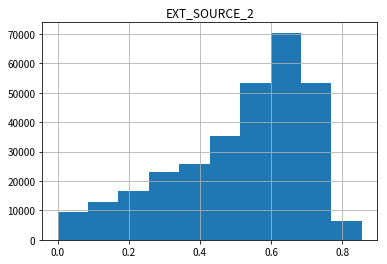

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
5    0.621226
6    0.492060
7    0.540654
8    0.751724
9         NaN
Name: EXT_SOURCE_3, dtype: float64


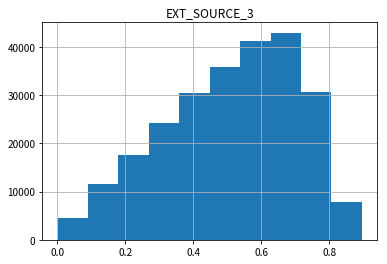

0    0.0247
1    0.0959
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: APARTMENTS_AVG, dtype: float64


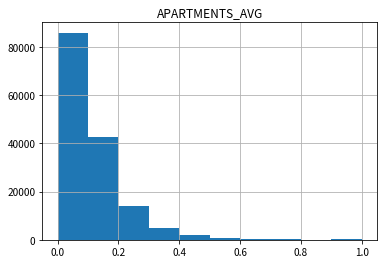

0    0.0369
1    0.0529
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: BASEMENTAREA_AVG, dtype: float64


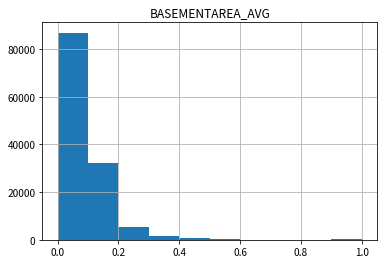

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64


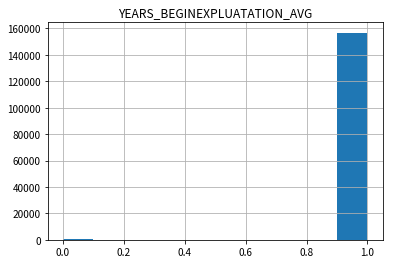

0    0.6192
1    0.7960
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: YEARS_BUILD_AVG, dtype: float64


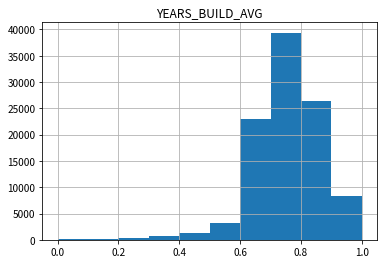

0    0.0143
1    0.0605
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: COMMONAREA_AVG, dtype: float64


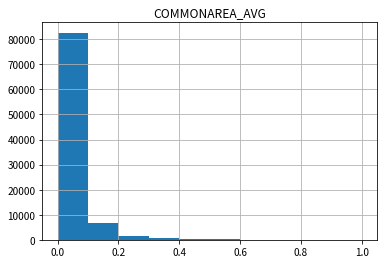

0    0.00
1    0.08
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
Name: ELEVATORS_AVG, dtype: float64


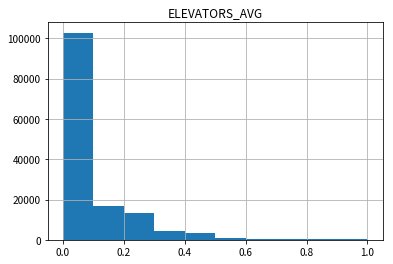

0    0.0690
1    0.0345
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: ENTRANCES_AVG, dtype: float64


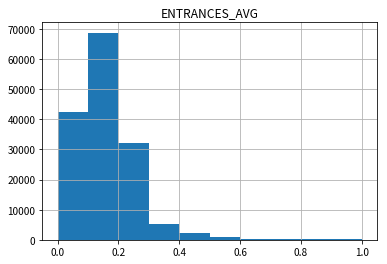

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: FLOORSMAX_AVG, dtype: float64


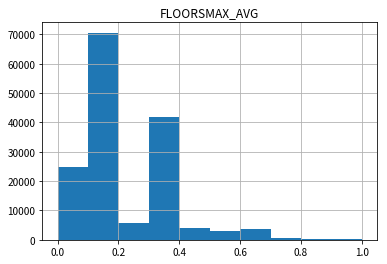

0    0.1250
1    0.3333
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: FLOORSMIN_AVG, dtype: float64


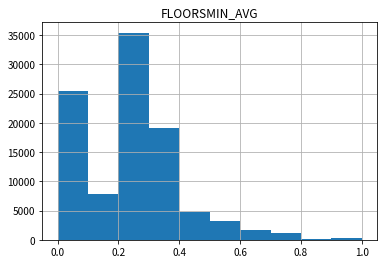

0    0.0369
1    0.0130
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: LANDAREA_AVG, dtype: float64


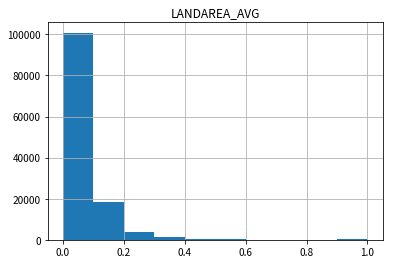

0    0.0202
1    0.0773
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: LIVINGAPARTMENTS_AVG, dtype: float64


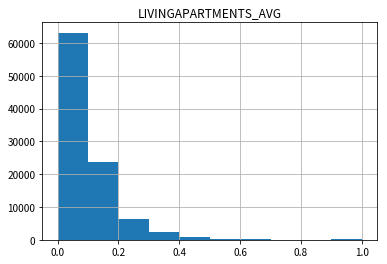

0    0.0190
1    0.0549
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: LIVINGAREA_AVG, dtype: float64


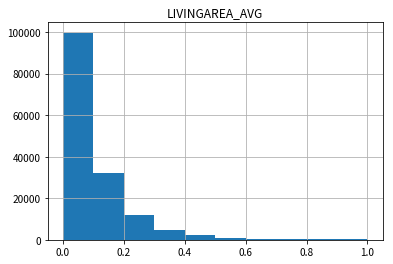

0    0.0000
1    0.0039
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: NONLIVINGAPARTMENTS_AVG, dtype: float64


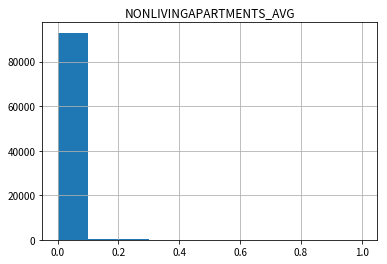

0    0.0000
1    0.0098
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: NONLIVINGAREA_AVG, dtype: float64


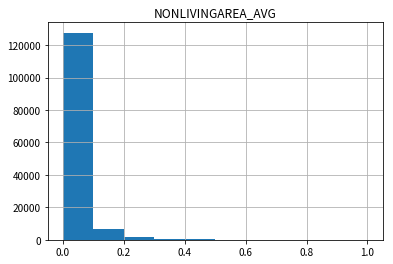

0    0.0252
1    0.0924
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: APARTMENTS_MODE, dtype: float64


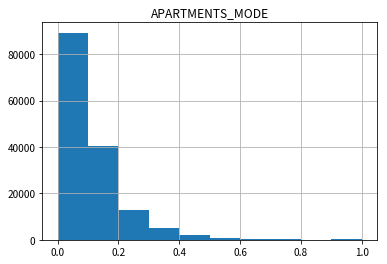

0    0.0383
1    0.0538
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: BASEMENTAREA_MODE, dtype: float64


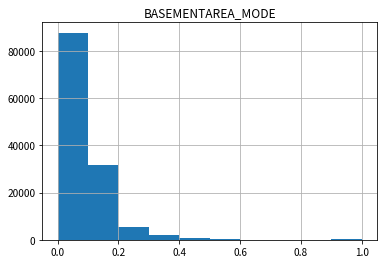

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64


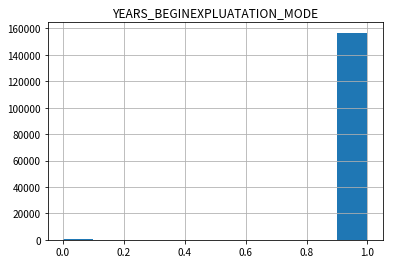

0    0.6341
1    0.8040
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: YEARS_BUILD_MODE, dtype: float64


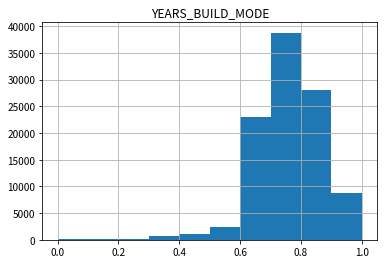

0    0.0144
1    0.0497
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: COMMONAREA_MODE, dtype: float64


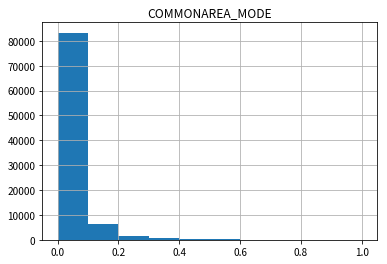

0    0.0000
1    0.0806
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: ELEVATORS_MODE, dtype: float64


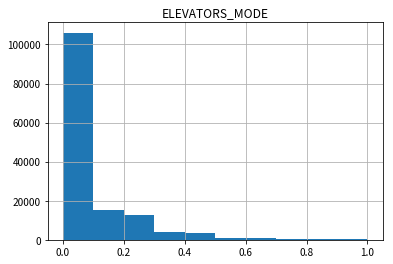

0    0.0690
1    0.0345
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: ENTRANCES_MODE, dtype: float64


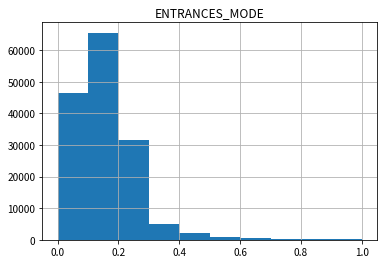

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: FLOORSMAX_MODE, dtype: float64


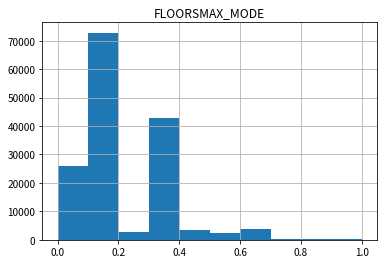

0    0.1250
1    0.3333
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: FLOORSMIN_MODE, dtype: float64


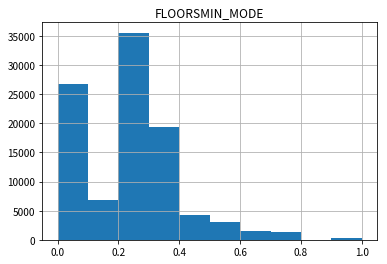

0    0.0377
1    0.0128
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: LANDAREA_MODE, dtype: float64


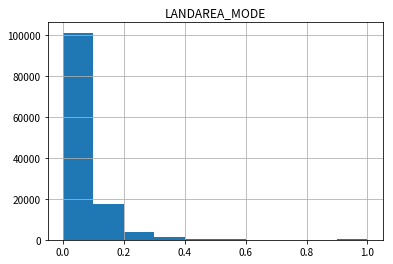

0    0.022
1    0.079
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
Name: LIVINGAPARTMENTS_MODE, dtype: float64


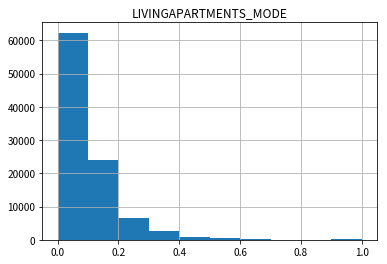

0    0.0198
1    0.0554
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: LIVINGAREA_MODE, dtype: float64


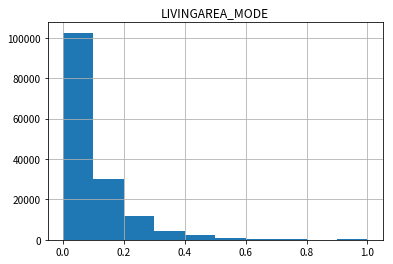

0    0.0
1    0.0
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: NONLIVINGAPARTMENTS_MODE, dtype: float64


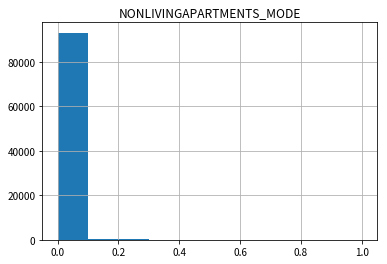

0    0.0
1    0.0
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: NONLIVINGAREA_MODE, dtype: float64


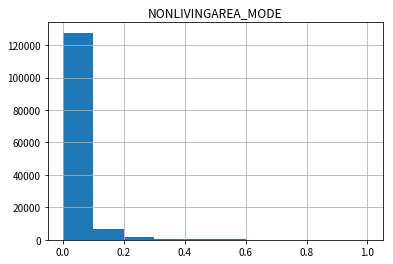

0    0.0250
1    0.0968
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: APARTMENTS_MEDI, dtype: float64


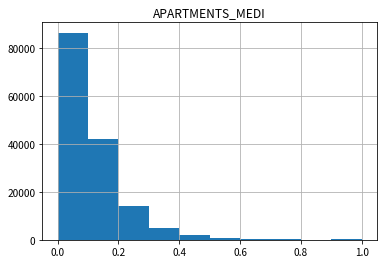

0    0.0369
1    0.0529
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: BASEMENTAREA_MEDI, dtype: float64


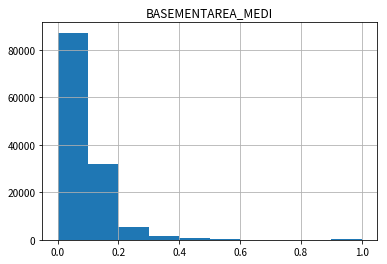

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64


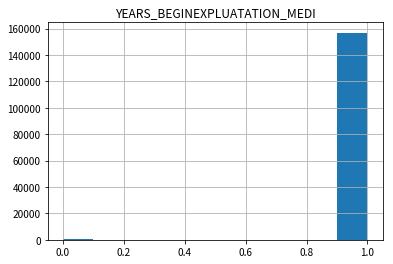

0    0.6243
1    0.7987
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: YEARS_BUILD_MEDI, dtype: float64


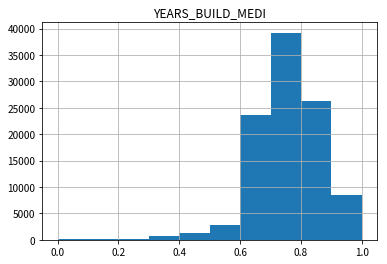

0    0.0144
1    0.0608
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: COMMONAREA_MEDI, dtype: float64


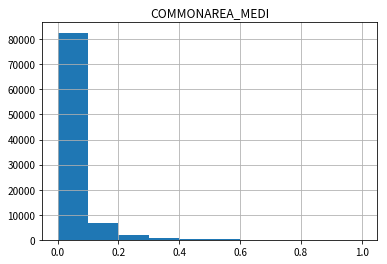

0    0.00
1    0.08
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
Name: ELEVATORS_MEDI, dtype: float64


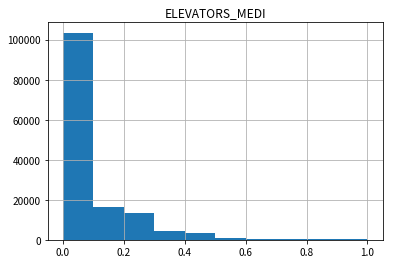

0    0.0690
1    0.0345
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: ENTRANCES_MEDI, dtype: float64


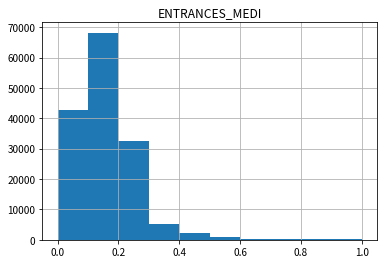

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: FLOORSMAX_MEDI, dtype: float64


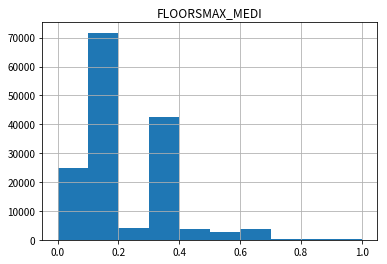

0    0.1250
1    0.3333
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: FLOORSMIN_MEDI, dtype: float64


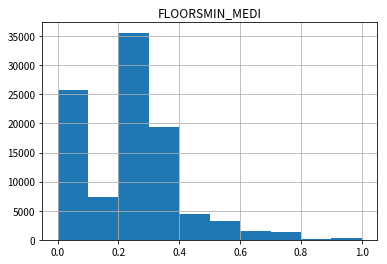

0    0.0375
1    0.0132
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: LANDAREA_MEDI, dtype: float64


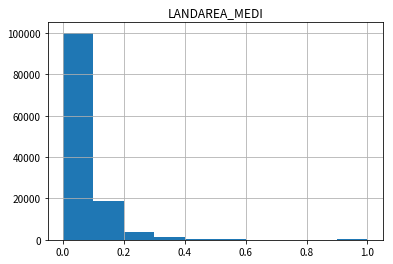

0    0.0205
1    0.0787
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: LIVINGAPARTMENTS_MEDI, dtype: float64


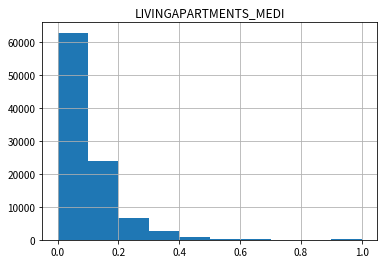

0    0.0193
1    0.0558
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: LIVINGAREA_MEDI, dtype: float64


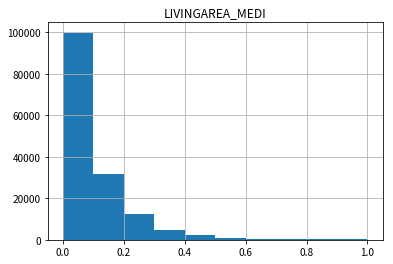

0    0.0000
1    0.0039
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: NONLIVINGAPARTMENTS_MEDI, dtype: float64


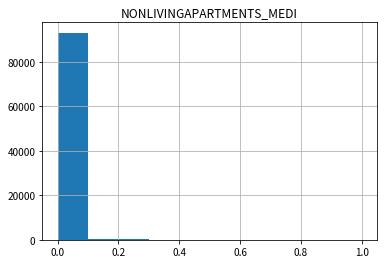

0    0.00
1    0.01
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
Name: NONLIVINGAREA_MEDI, dtype: float64


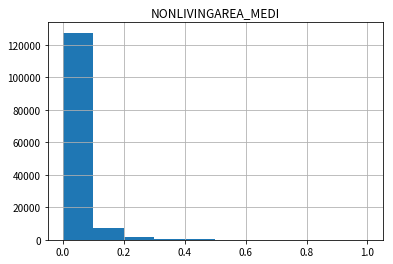

0    0.0149
1    0.0714
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: TOTALAREA_MODE, dtype: float64


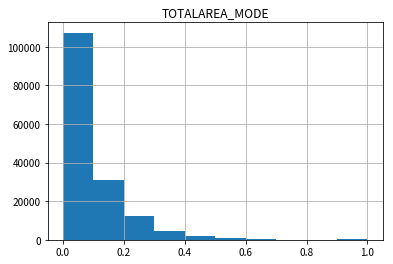

0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
5    0.0
6    1.0
7    2.0
8    1.0
9    2.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


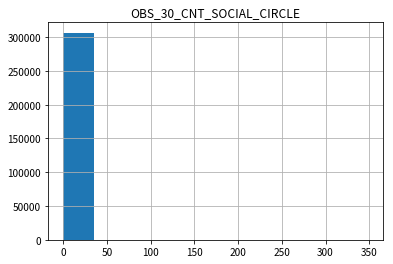

0    2.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


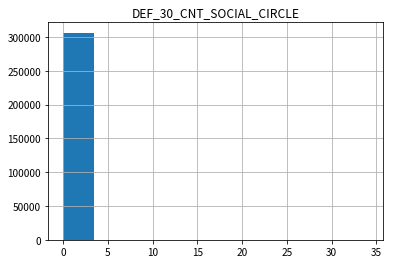

0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
5    0.0
6    1.0
7    2.0
8    1.0
9    2.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


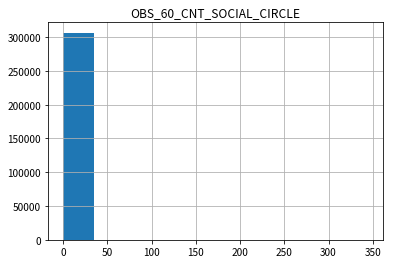

0    2.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


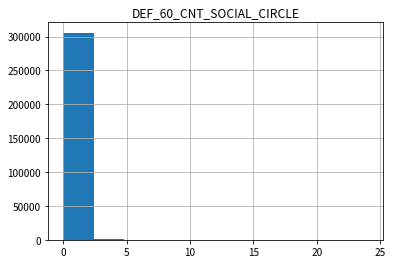

0   -1134.0
1    -828.0
2    -815.0
3    -617.0
4   -1106.0
5   -2536.0
6   -1562.0
7   -1070.0
8       0.0
9   -1673.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


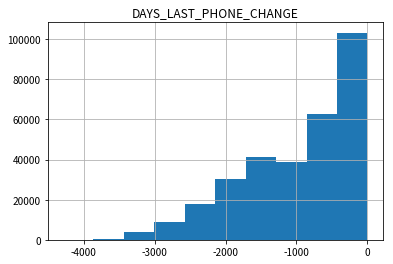

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


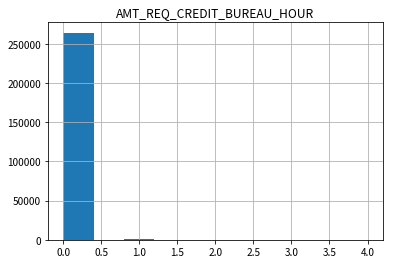

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


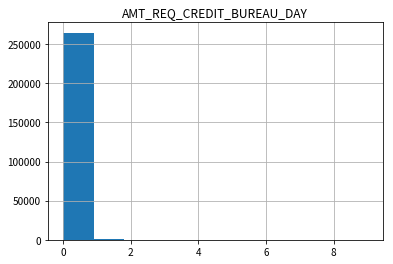

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


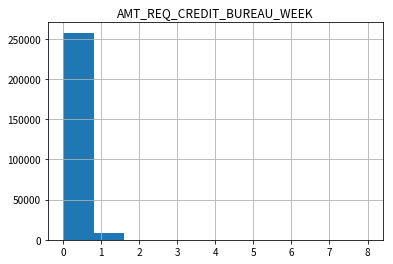

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    1.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


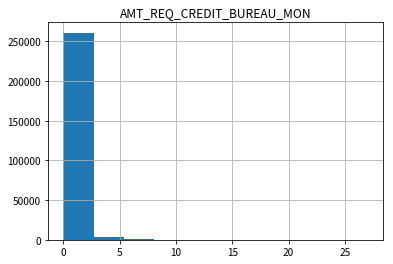

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    1.0
6    1.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


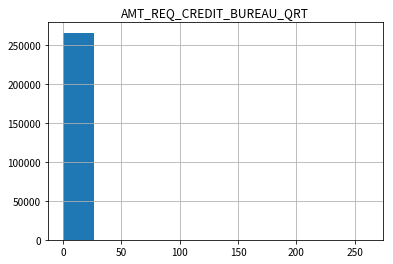

0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
5    1.0
6    2.0
7    0.0
8    1.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


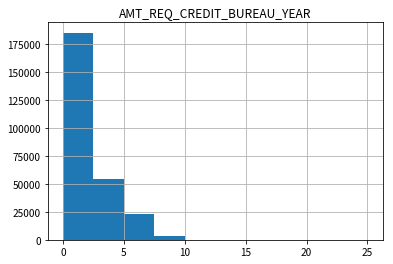

In [6]:
# 先篩選數值型的欄位
dtype_select = [np.dtype('float64')]

numeric_columns = list(df.columns[list(df.dtypes.isin(dtype_select))]) #選取型態為float64的欄位

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(df[numeric_columns].columns[list(df[numeric_columns].apply(lambda x: len(x.unique())!=2 ))])
print("Numbers of remain columns: %i" % len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:    # numeric_columns為篩選出的所有欄位名稱串列
    print(df[:10][col])
    p = df[col].hist()
    p.set_title(col)
    plt.show()


In [ ]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

In [12]:
df['AMT_INCOME_TOTAL'].describe()
df['AMT_INCOME_TOTAL'].value_counts()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
225000.0    20698
202500.0    16341
67500.0     11147
270000.0    10827
81000.0      6001
315000.0     5862
247500.0     5344
126000.0     4668
360000.0     4115
121500.0     3848
99000.0      3633
292500.0     3418
103500.0     3330
76500.0      3146
144000.0     3123
171000.0     2647
450000.0     2435
117000.0     2390
54000.0      2319
72000.0      2187
166500.0     2053
45000.0      2043
108000.0     1946
337500.0     1790
94500.0      1747
            ...  
100300.5        1
200794.5        1
100476.0        1
200961.0        1
200997.0        1
100507.5        1
100516.5        1
50274.0         1
201127.5        1
100566.0        1
402376.5        1
100629.0        1
201267.0        1
50323.5         1
201361.5        1
100786.5        1
201658.5        1
100854.0        1
245046.6        1
201811.5        1
403650.0        1
100944.0        1
58950.0         1
101083.5        1
404406.0  

In [10]:
df['REGION_POPULATION_RELATIVE'].describe()
df['REGION_POPULATION_RELATIVE'].value_counts()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [13]:
df['OBS_60_CNT_SOCIAL_CIRCLE'].describe()
df['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
344.0         1
47.0          1
26.0          1
30.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

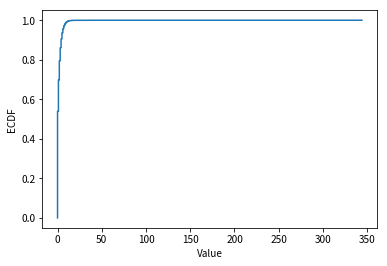

In [27]:
# 繪製 Empirical Cumulative Density Plot (ECDF)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(df['OBS_60_CNT_SOCIAL_CIRCLE'])
fil= (df['OBS_60_CNT_SOCIAL_CIRCLE'].sort_values()).fillna(0)
ecdf = ECDF(fil)
#print(ecdf.x)
#print(ecdf.y)

plt.plot(ecdf.x[1:], ecdf.y[1:]/ecdf.y[1:].max())
plt.xlabel('Value')
plt.ylabel('ECDF')
#plt.xlim([ecdf.x[1:].min(), ecdf.x[1:].max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


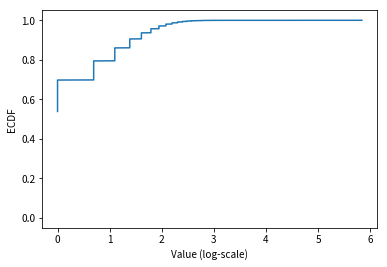

In [26]:
# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(ecdf.x[1:])), ecdf.y[1:]/ecdf.y[1:].max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()